In [104]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
#Accuracy Check
from sklearn.model_selection import cross_val_score

#Encoders
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#Scalers
from sklearn.preprocessing import StandardScaler

#Importing train, test split library
from sklearn.model_selection import train_test_split

# Libraries to test model on different thresholds
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

#Metrices import
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectFromModel
from numpy import loadtxt
from numpy import sort

#Import warnings
import warnings
warnings.filterwarnings("ignore")

#Importing custom packages
from sklearn.base import TransformerMixin

#For proper display of all columns
from IPython.display import display
pd.options.display.max_columns = None

In [2]:

import os
os.getcwd()

'/home/saurav/Desktop/self/kaggle/5588ead85a1811ea/Animal State Prediction - dataset'

In [164]:
sample_submission = pd.read_csv("sample_submission.csv")
test = pd.read_csv("test.csv",index_col='animal_id_outcome')
train = pd.read_csv("train.csv",index_col='animal_id_outcome')
l1 = set(train.columns) - set(test.columns)
display(l1)
#print(list(l1))
l1 = l1 - set(['outcome_type'])
print(list(l1))

{'outcome_type'}

[]


In [4]:
train.columns

Index([u'dob_year', u'dob_month', u'age_upon_intake', u'animal_type', u'breed',
       u'color', u'intake_condition', u'intake_type', u'sex_upon_intake',
       u'count', u'age_upon_intake_(days)', u'age_upon_intake_(years)',
       u'age_upon_intake_age_group', u'intake_datetime', u'intake_month',
       u'intake_year', u'intake_monthyear', u'intake_weekday', u'intake_hour',
       u'intake_number', u'time_in_shelter', u'time_in_shelter_days',
       u'age_upon_outcome', u'date_of_birth', u'sex_upon_outcome',
       u'age_upon_outcome_(days)', u'age_upon_outcome_(years)',
       u'age_upon_outcome_age_group', u'outcome_datetime', u'outcome_month',
       u'outcome_year', u'outcome_monthyear', u'outcome_weekday',
       u'outcome_hour', u'outcome_number', u'outcome_type'],
      dtype='object')

In [5]:
train.describe()

,dob_year,dob_month,count,age_upon_intake_(days),age_upon_intake_(years),intake_month,intake_year,intake_hour,intake_number,time_in_shelter_days,age_upon_outcome_(days),age_upon_outcome_(years),outcome_month,outcome_year,outcome_hour,outcome_number
count,47803.000000,47803.000000,47803.0,47803.000000,47803.000000,47803.000000,47803.000000,47803.000000,47803.000000,47803.000000,47803.000000,47803.000000,47803.000000,47803.000000,47803.000000,47803.000000
mean,2012.197728,6.337531,1.0,841.679915,2.305972,6.596113,2014.600046,13.549087,1.144552,17.143366,855.319729,2.343342,6.650587,2014.638893,14.381545,1.144552
std,3.068255,3.342038,0.0,1100.557953,3.015227,3.460172,0.905731,3.179397,0.500055,46.600727,1103.598596,3.023558,3.490263,0.912706,3.456145,0.500055
min,1992.000000,1.000000,1.0,0.000000,0.000000,1.000000,2013.000000,0.000000,1.000000,0.000694,0.000000,0.000000,1.000000,2013.000000,0.000000,1.000000
25%,2011.000000,4.000000,1.0,60.000000,0.164384,4.000000,2014.000000,11.000000,1.000000,1.049653,90.000000,0.246575,4.000000,2014.000000,12.000000,1.000000
50%,2013.000000,6.000000,1.0,365.000000,1.000000,7.000000,2015.000000,13.000000,1.000000,4.972222,365.000000,1.000000,7.000000,2015.000000,15.000000,1.000000
75%,2014.000000,9.000000,1.0,1095.000000,3.000000,10.000000,2015.000000,16.000000,1.000000,13.113889,1095.000000,3.000000,10.000000,2015.000000,17.000000,1.000000
max,2016.000000,12.000000,1.0,8030.000000,22.000000,12.000000,2018.000000,23.000000,13.000000,1606.194444,8030.000000,22.000000,12.000000,2018.000000,23.000000,13.000000


In [6]:
train.head()

,dob_year,dob_month,age_upon_intake,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,count,...,age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,outcome_type
animal_id_outcome,,,,,,,,,,,,,,,,,,,,,
A006100,2007,7,10 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Stray,Neutered Male,1,...,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,12,2017,2017-12,Thursday,0,1.0,Return to Owner
A006100,2007,7,7 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,1,...,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,12,2014,2014-12,Saturday,16,2.0,Return to Owner
A006100,2007,7,6 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,1,...,6.0,"(5.0, 7.5]",NaN,3,2014,2014-03,Saturday,17,3.0,Return to Owner
A047759,2004,4,10 years,Dog,Dachshund,Tricolor,Normal,Owner Surrender,Neutered Male,1,...,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,4,2014,2014-04,Monday,15,1.0,Missing
A134067,1997,10,16 years,Dog,Shetland Sheepdog,Brown/White,Injured,Public Assist,Neutered Male,1,...,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,11,2013,2013-11,Saturday,11,1.0,Return to Owner


In [26]:
print(np.shape(train))
print(train['outcome_type'].value_counts())
print('-----------------------------------------')
print(train['outcome_type'].value_counts(normalize=True))

(47803, 36)
Adoption           12967
Transfer           10345
Return to Owner     9718
Euthanasia          4144
Died                2829
Missing             2599
Relocate            2573
Rto-Adopt           2450
Disposal             178
Name: outcome_type, dtype: int64
-----------------------------------------
Adoption           0.271259
Transfer           0.216409
Return to Owner    0.203293
Euthanasia         0.086689
Died               0.059180
Missing            0.054369
Relocate           0.053825
Rto-Adopt          0.051252
Disposal           0.003724
Name: outcome_type, dtype: float64


Text(0,0.5,'Frequency')

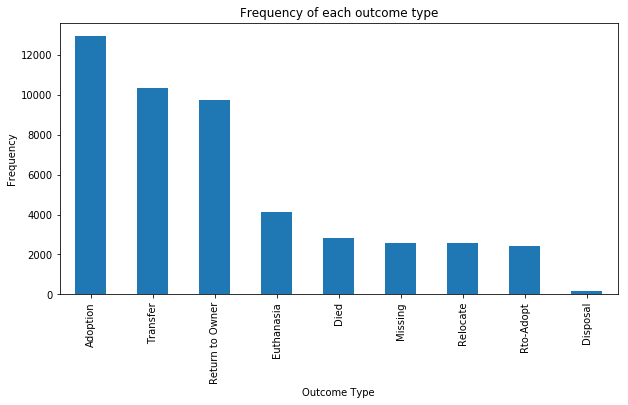

In [35]:
ax = train['outcome_type'].value_counts().plot(kind='bar',figsize=(10,5),title="Frequency of each outcome type")
ax.set_xlabel("Outcome Type")
ax.set_ylabel("Frequency")

In [36]:
print(train.animal_type.unique())
print(train.intake_condition.unique())
print(train.intake_type.unique())
print(train.sex_upon_intake.unique())
print(train.outcome_type.unique())


['Dog' 'Cat' 'Other' 'Bird']
['Normal' 'Injured' 'Aged' 'Sick' 'Other' 'Feral' 'Pregnant' 'Nursing']
['Stray' 'Public Assist' 'Owner Surrender' 'Euthanasia Request' 'Wildlife']
['Neutered Male' 'Spayed Female' 'Intact Female' 'Intact Male' 'Unknown'
 nan]
['Return to Owner' 'Missing' 'Transfer' 'Adoption' 'Euthanasia' 'Rto-Adopt'
 'Relocate' 'Died' 'Disposal']


In [182]:
train['outcome_type'].replace('Return to Owner',0,inplace=True)
train['outcome_type'].replace('Missing',1,inplace=True)
train['outcome_type'].replace('Transfer',2,inplace=True)
train['outcome_type'].replace('Adoption',3,inplace=True)
train['outcome_type'].replace('Euthanasia',4,inplace=True)
train['outcome_type'].replace('Rto-Adopt',5,inplace=True)
train['outcome_type'].replace('Relocate',6,inplace=True)
train['outcome_type'].replace('Died',7,inplace=True)
train['outcome_type'].replace('Disposal',8,inplace=True)
map_severity = {0:'Return to Owner',1:'Missing',2:'Transfer',3:'Adoption',4:'Euthanasia',5:'Rto-Adopt',6:'Relocate',7:'Died',8:'Disposal'}

In [21]:
train.head()

,dob_year,dob_month,age_upon_intake,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,count,...,age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,outcome_type
animal_id_outcome,,,,,,,,,,,,,,,,,,,,,
A006100,2007,7,10 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Stray,Neutered Male,1,...,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,12,2017,2017-12,Thursday,0,1.0,0
A006100,2007,7,7 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,1,...,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,12,2014,2014-12,Saturday,16,2.0,0
A006100,2007,7,6 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,1,...,6.0,"(5.0, 7.5]",NaN,3,2014,2014-03,Saturday,17,3.0,0
A047759,2004,4,10 years,Dog,Dachshund,Tricolor,Normal,Owner Surrender,Neutered Male,1,...,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,4,2014,2014-04,Monday,15,1.0,1
A134067,1997,10,16 years,Dog,Shetland Sheepdog,Brown/White,Injured,Public Assist,Neutered Male,1,...,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,11,2013,2013-11,Saturday,11,1.0,0


In [147]:
#split training data
x_train = train.drop('outcome_type',axis=1)
y_train = train['outcome_type']

In [23]:
features = x_train.columns
print(features)

Index([u'dob_year', u'dob_month', u'age_upon_intake', u'animal_type', u'breed',
       u'color', u'intake_condition', u'intake_type', u'sex_upon_intake',
       u'count', u'age_upon_intake_(days)', u'age_upon_intake_(years)',
       u'age_upon_intake_age_group', u'intake_datetime', u'intake_month',
       u'intake_year', u'intake_monthyear', u'intake_weekday', u'intake_hour',
       u'intake_number', u'time_in_shelter', u'time_in_shelter_days',
       u'age_upon_outcome', u'date_of_birth', u'sex_upon_outcome',
       u'age_upon_outcome_(days)', u'age_upon_outcome_(years)',
       u'age_upon_outcome_age_group', u'outcome_datetime', u'outcome_month',
       u'outcome_year', u'outcome_monthyear', u'outcome_weekday',
       u'outcome_hour', u'outcome_number'],
      dtype='object')


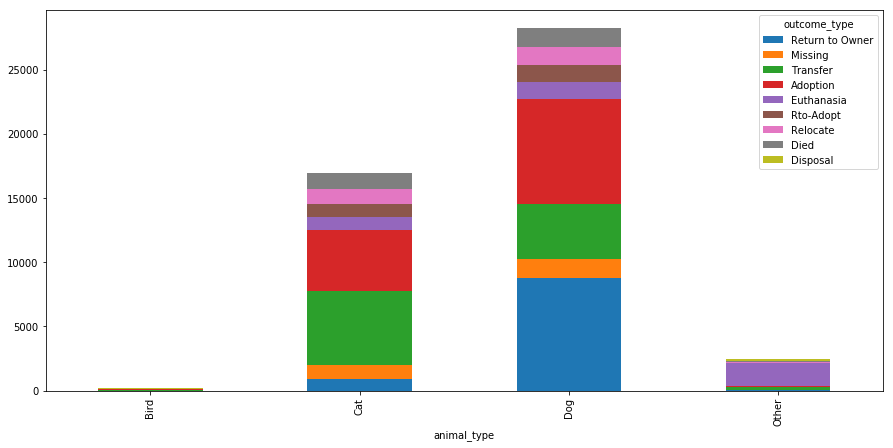

In [43]:
#Distribution animal type
df1 = train.groupby(['animal_type', 'outcome_type'])['animal_type'].count().unstack('outcome_type').fillna(0)
df1[train.outcome_type.unique()].plot(kind='bar', stacked=True,figsize=(15,7))

In [44]:
#df1 = train.groupby('animal_type')

In [56]:
df_dog = train.loc[train['animal_type'] == 'Dog']
df_cat = train.loc[train['animal_type'] == 'Cat']
df_bird = train.loc[train['animal_type'] == 'Bird']
df_other = train.loc[train['animal_type'] == 'Other']

In [58]:
print(df_dog.breed.unique())
print(df_cat.breed.unique())
print(df_bird.breed.unique())
print(df_other.breed.unique())

['Spinone Italiano Mix' 'Dachshund' 'Shetland Sheepdog' ...,
 'Dachshund/Pomeranian' 'Rhod Ridgeback/Chow Chow' 'Mastiff/Bloodhound']
['Domestic Longhair Mix' 'American Shorthair Mix' 'Domestic Shorthair'
 'Domestic Shorthair Mix' 'Siamese' 'Siamese Mix' 'Scottish Fold Mix'
 'Abyssinian Mix' 'Maine Coon Mix' 'Snowshoe/Ragdoll' 'Snowshoe Mix'
 'Domestic Longhair/Persian' 'Domestic Longhair' 'Ragdoll Mix' 'Maine Coon'
 'Domestic Medium Hair Mix' 'Russian Blue Mix' 'Persian Mix'
 'Chartreux Mix' 'Oriental Sh Mix' 'Tonkinese Mix' 'Manx Mix'
 'Snowshoe/Domestic Shorthair' 'Domestic Longhair/Domestic Longhair'
 'British Shorthair' 'Domestic Medium Hair' 'Himalayan Mix' 'Bengal'
 'Balinese Mix' 'British Shorthair Mix' 'Siamese/Domestic Shorthair'
 'Exotic Shorthair Mix' 'Bengal Mix' 'Bombay Mix' 'Burmese'
 'Manx/Domestic Shorthair' 'Angora Mix' 'Japanese Bobtail Mix'
 'Norwegian Forest Cat Mix' 'Manx/Domestic Longhair' 'Snowshoe'
 'Angora/Persian' 'Domestic Shorthair/British Shorthair' 'Russi

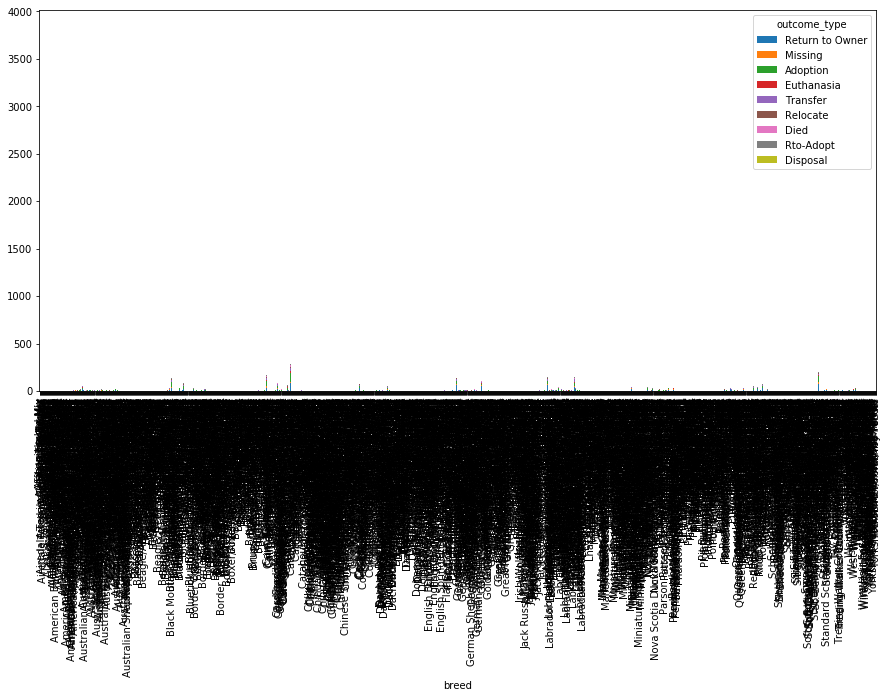

In [57]:
#Distribution based on dog breed
df1 = df_dog.groupby(['breed', 'outcome_type'])['breed'].count().unstack('outcome_type').fillna(0)
df1[df_dog.outcome_type.unique()].plot(kind='bar', stacked=True,figsize=(15,7))

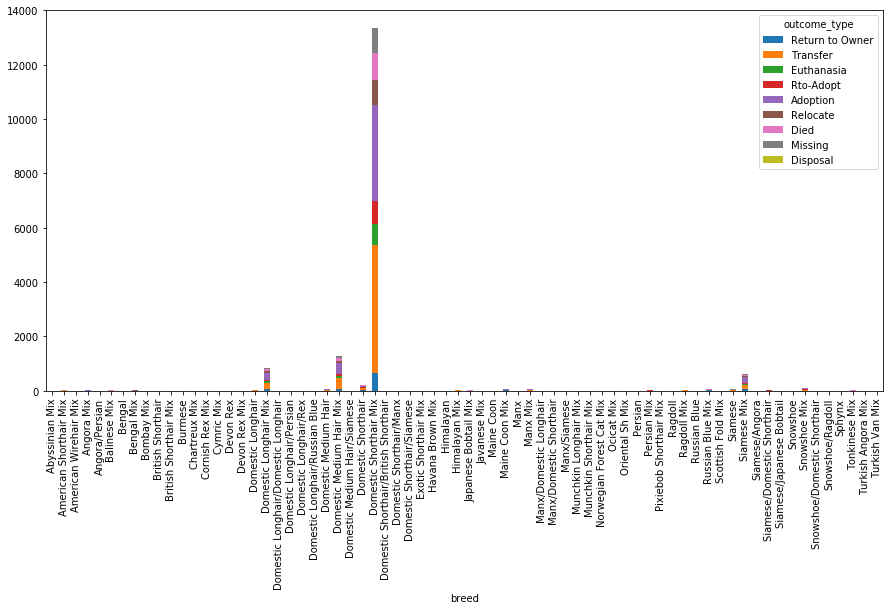

In [59]:
#Distribution based on cat breed
df1 = df_cat.groupby(['breed', 'outcome_type'])['breed'].count().unstack('outcome_type').fillna(0)
df1[df_cat.outcome_type.unique()].plot(kind='bar', stacked=True,figsize=(15,7))

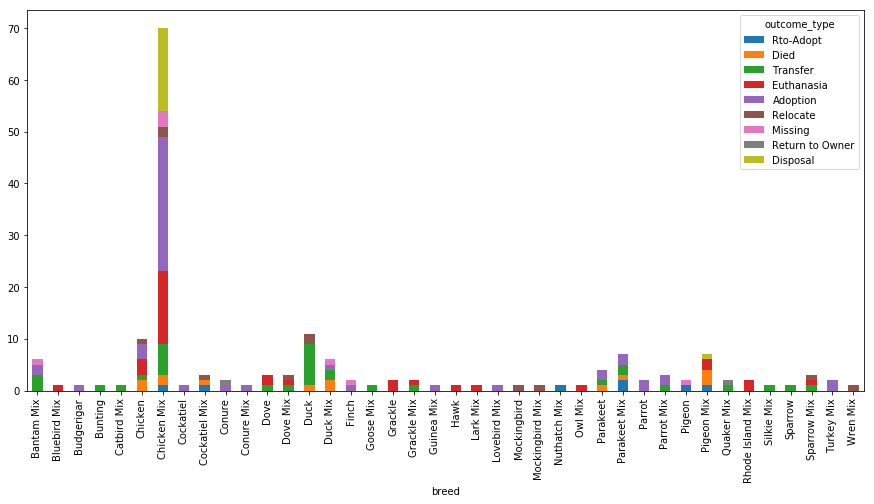

In [60]:
#Distribution based on bird breed
df1 = df_bird.groupby(['breed', 'outcome_type'])['breed'].count().unstack('outcome_type').fillna(0)
df1[df_bird.outcome_type.unique()].plot(kind='bar', stacked=True,figsize=(15,7))

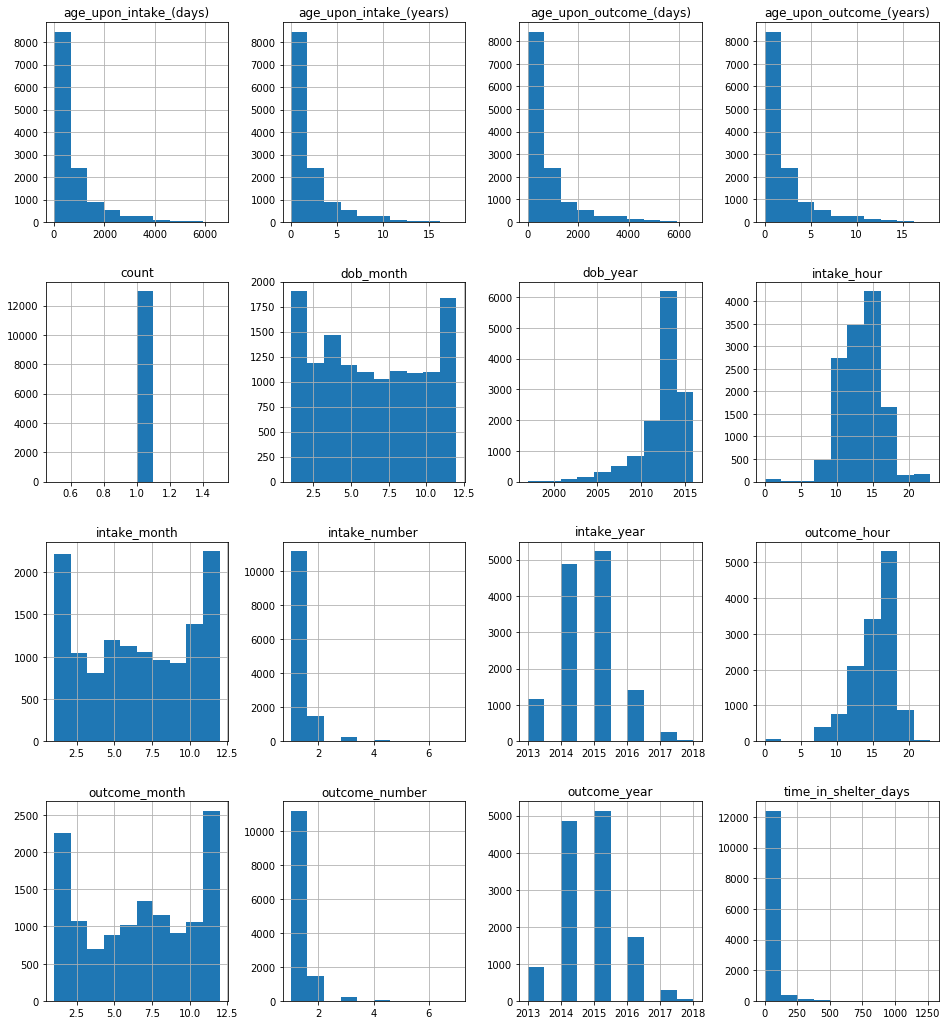

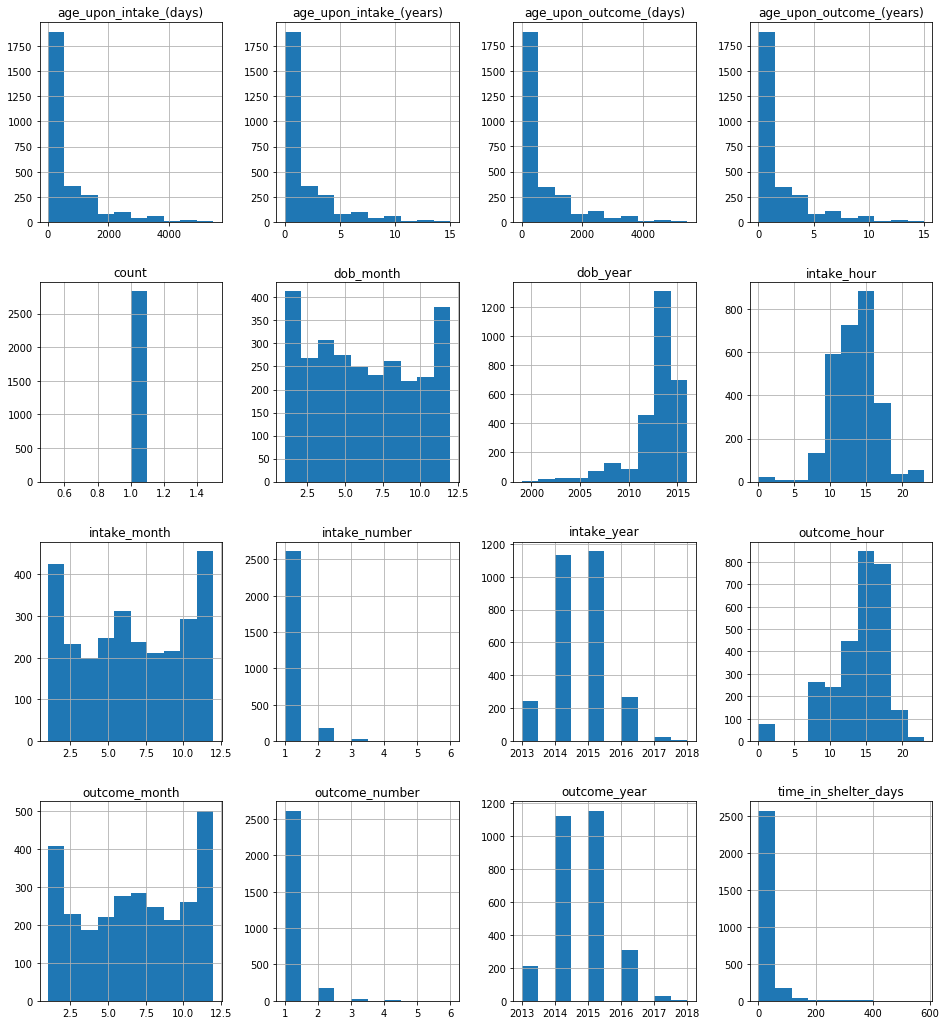

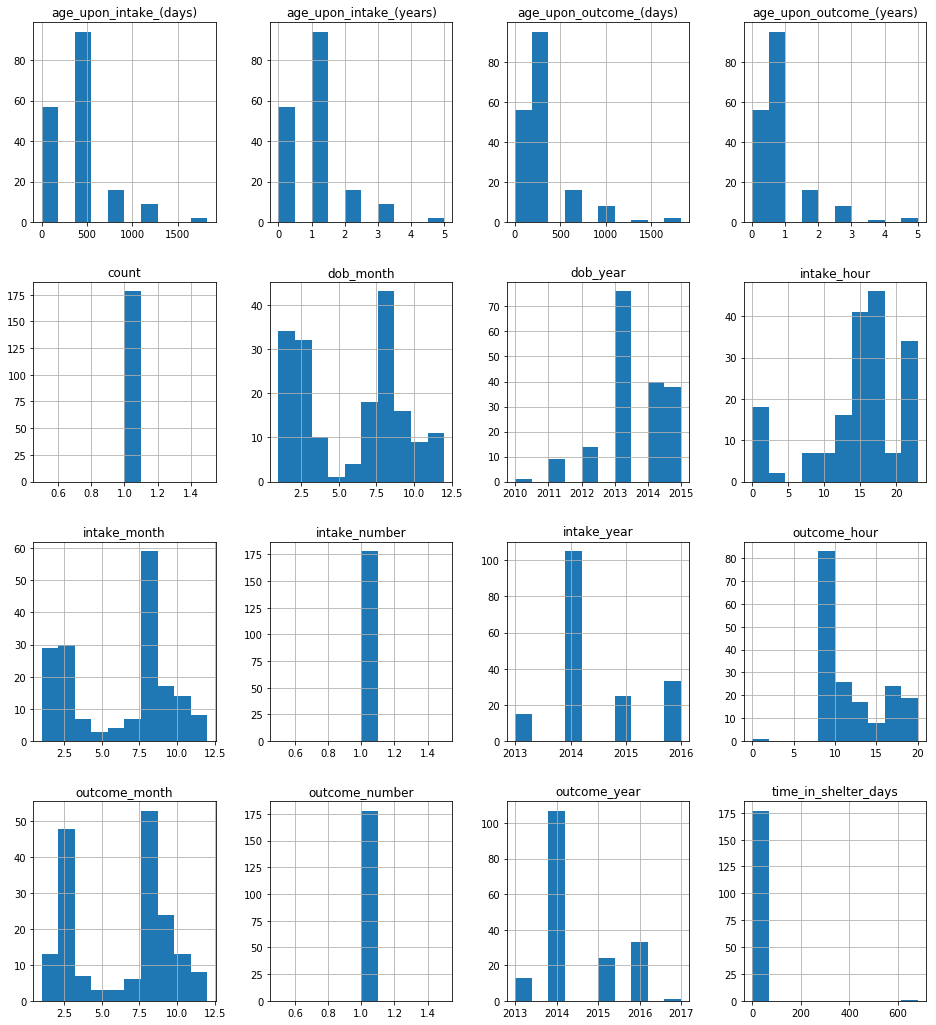

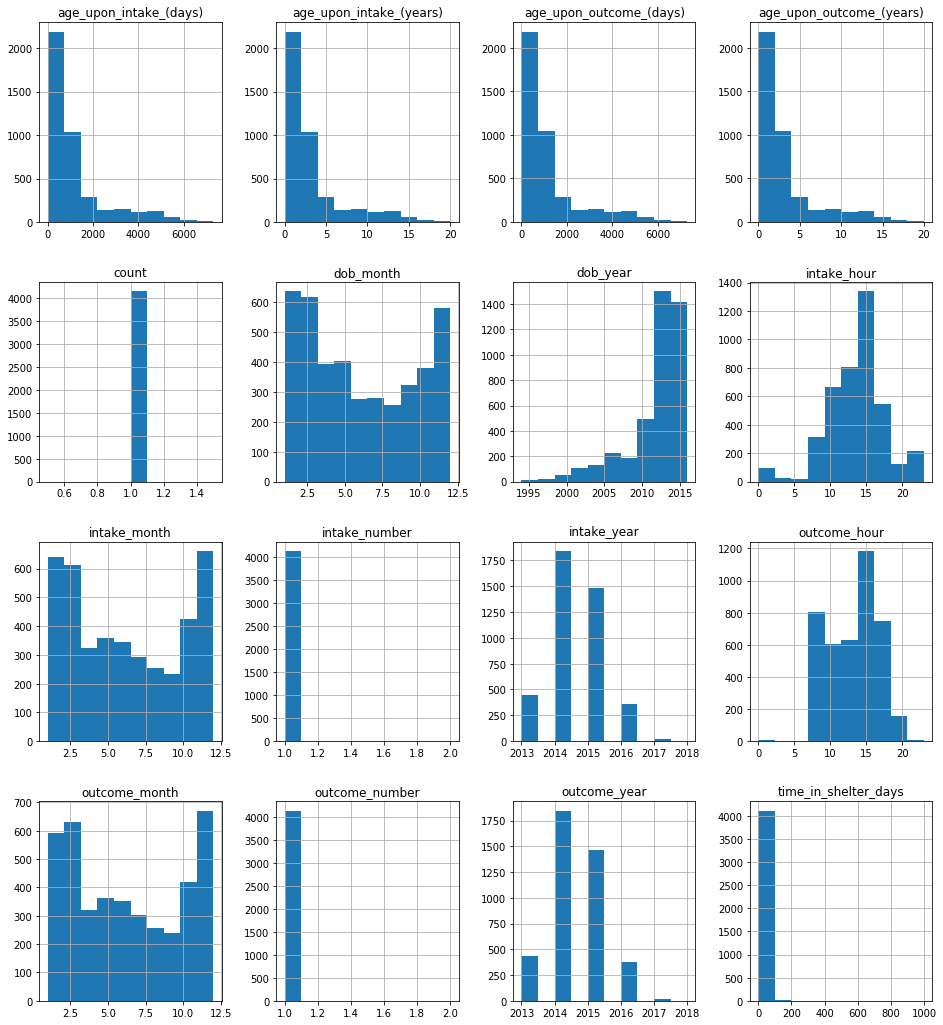

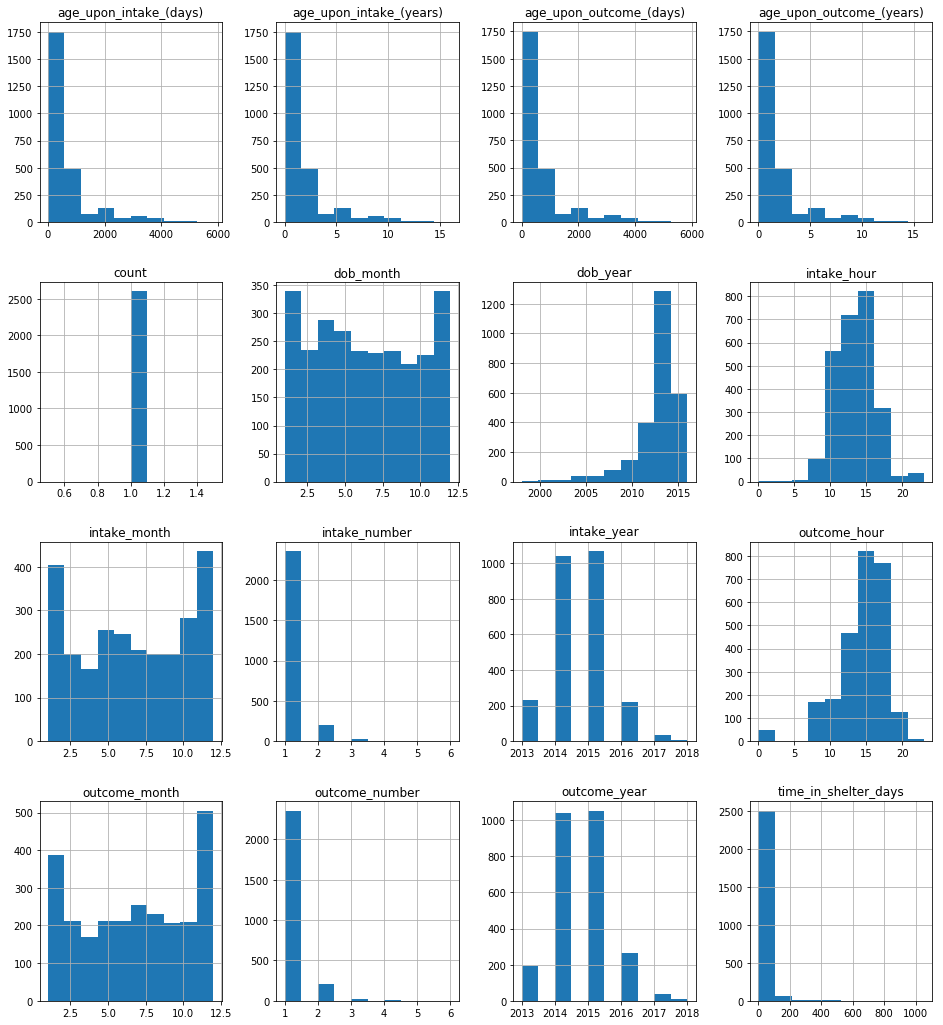

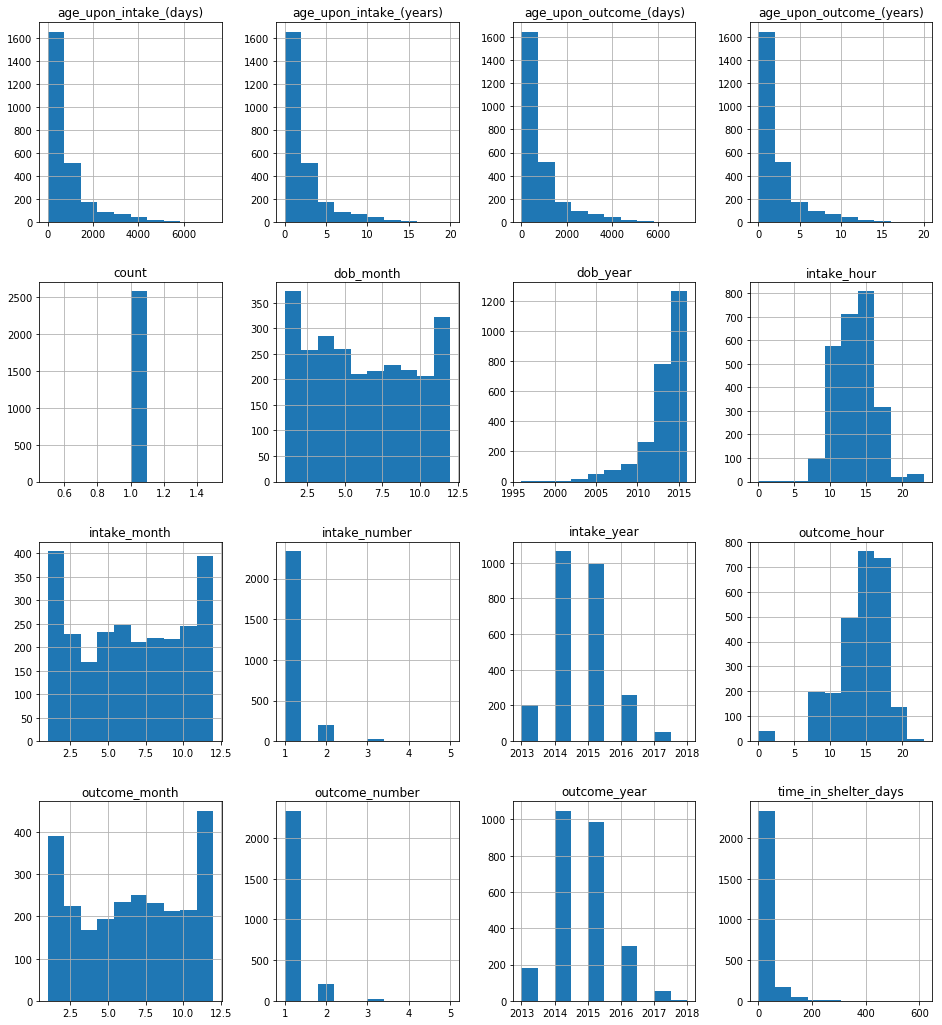

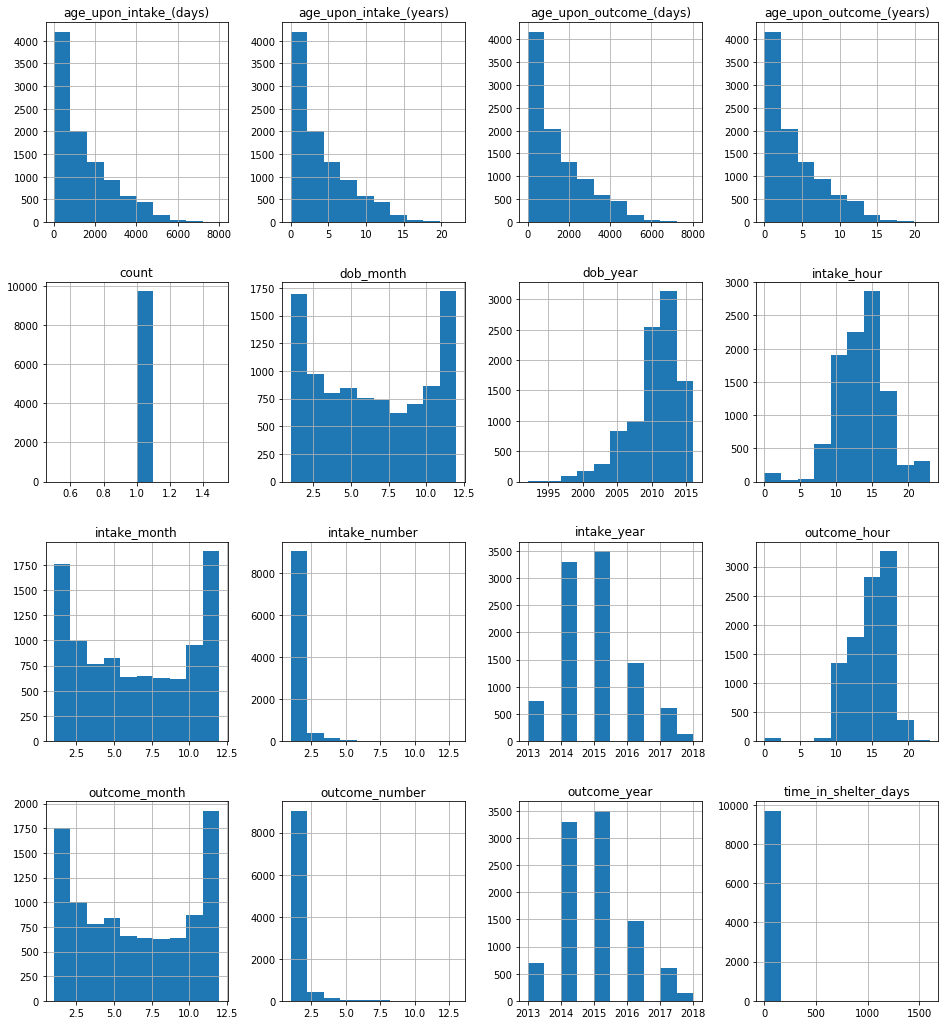

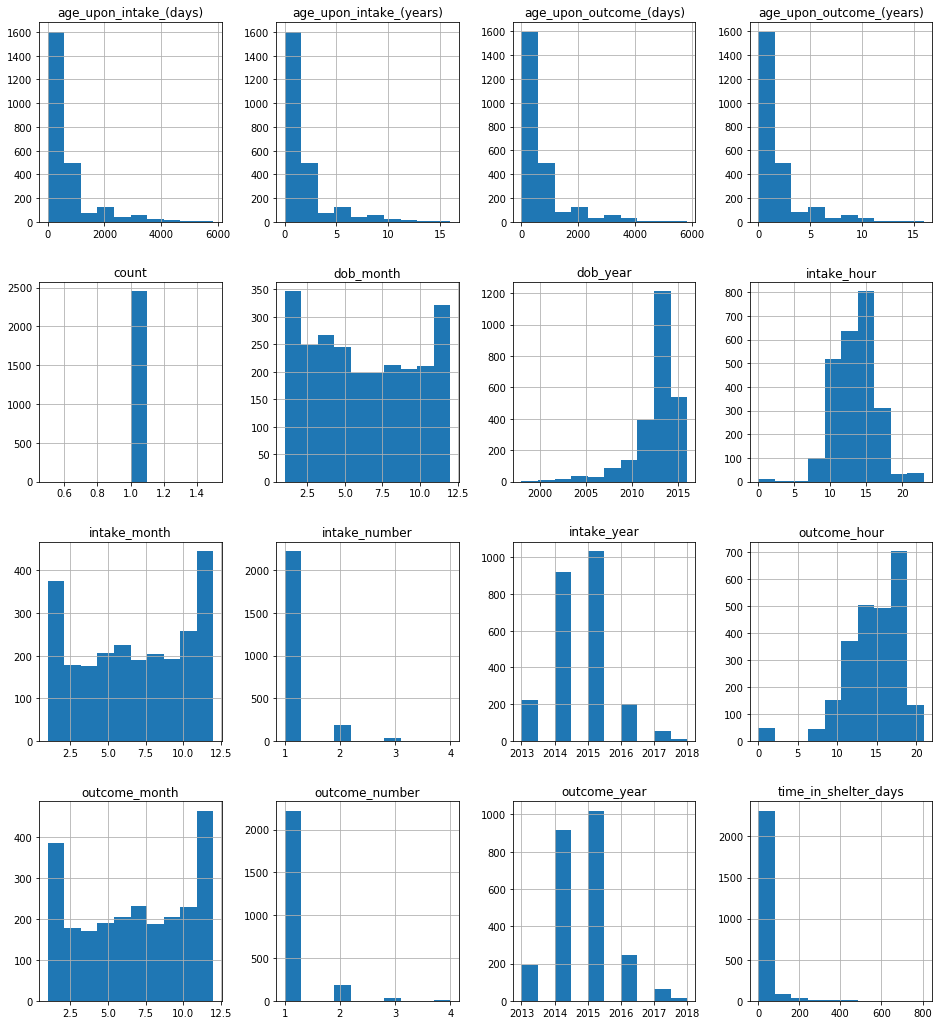

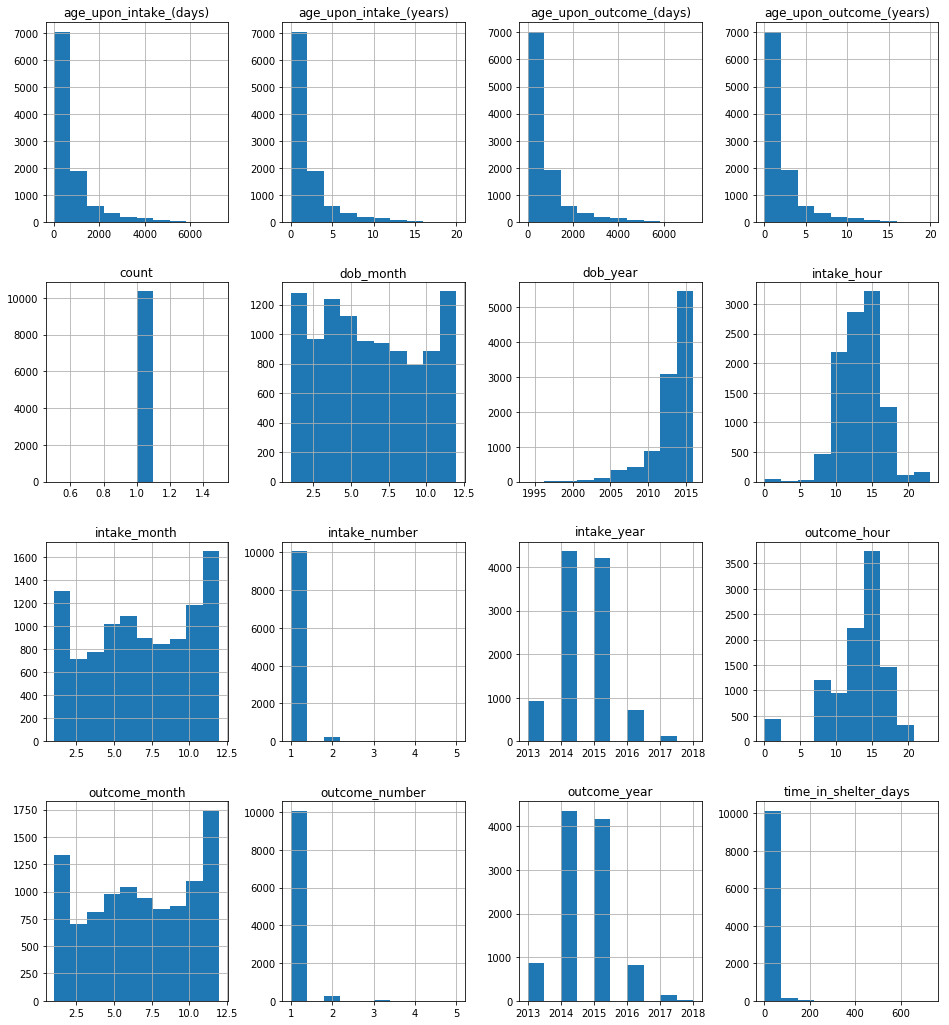

In [61]:
plots = train.groupby('outcome_type').hist(figsize = (16,18))

In [169]:
def onehotdataframe(X_check):    
    one_hot_animal_type=pd.get_dummies(X_check.animal_type)

    one_hot_intake_condition = pd.get_dummies(X_check.intake_condition)
    one_hot_intake_condition.columns = [str(col) + '_intake' for col in one_hot_intake_condition.columns]

    one_hot_intake_type = pd.get_dummies(X_check.intake_type)
    one_hot_intake_type.columns = [str(col) + '_intake' for col in one_hot_intake_type.columns]

    one_hot_sex_upon_intake = pd.get_dummies(X_check.sex_upon_intake)
    one_hot_sex_upon_intake.columns = [str(col) + '_intake' for col in one_hot_sex_upon_intake.columns]

    one_hot_intake_weekday = pd.get_dummies(X_check.intake_weekday)
    one_hot_intake_weekday.columns = [str(col) + '_intake' for col in one_hot_intake_weekday.columns]

    one_hot_sex_upon_outcome = pd.get_dummies(X_check.sex_upon_outcome)
    one_hot_sex_upon_outcome.columns = [str(col) + '_outcome' for col in one_hot_sex_upon_outcome.columns]

    one_hot_outcome_weekday = pd.get_dummies(X_check.outcome_weekday)
    one_hot_outcome_weekday.columns = [str(col) + '_outcome' for col in one_hot_outcome_weekday.columns]     
    #print(l1)
    #X_check = X_check.drop(l1, axis = 1) 
    X_check = X_check.drop(['animal_type','intake_type', 'intake_condition', 'sex_upon_intake', 'intake_weekday', 'sex_upon_outcome', 'outcome_weekday'], axis = 1) 
    #X_check = X_check.drop(['intake_type', 'intake_condition', 'sex_upon_intake', 'intake_weekday', 'sex_upon_outcome', 'outcome_weekday'], axis = 1) 
    #Merging one hot encoded features with our dataset 'data' 
    X_check=pd.concat([X_check, one_hot_animal_type,one_hot_intake_condition,one_hot_intake_type,one_hot_sex_upon_intake,one_hot_intake_weekday,one_hot_sex_upon_outcome,one_hot_outcome_weekday],axis=1)
    #X_check=pd.concat([X_check,one_hot_intake_condition,one_hot_intake_type,one_hot_sex_upon_intake,one_hot_intake_weekday,one_hot_sex_upon_outcome,one_hot_outcome_weekday],axis=1)
    
    return(X_check)

In [167]:
x_train = train.drop('outcome_type',axis=1)
y_train = train['outcome_type']

In [174]:
test = onehotdataframe(test)
le1= LabelEncoder()
le2= LabelEncoder()

le1.fit(test['breed'])
#print(le1.classes_)

test['breed'] = le1.transform(test['breed'])

le2.fit(test['color'])
#print(le2.classes_)

test['color'] = le2.transform(test['color'])


In [ ]:
X_check = onehotdataframe(x_train)
le1= LabelEncoder()
le2= LabelEncoder()

le1.fit(X_check['breed'])
#print(le1.classes_)

X_check['breed'] = le1.transform(X_check['breed'])

le2.fit(X_check['color'])
#print(le2.classes_)

X_check['color'] = le2.transform(X_check['color'])

In [175]:
#split training data
#x_train = train.drop('outcome_type',axis=1)
#y_train = train['outcome_type']
x_train = X_check
x_train = x_train.drop(['outcome_datetime','outcome_monthyear','intake_datetime','intake_monthyear','age_upon_intake', 'age_upon_intake_(years)', 'age_upon_intake_age_group', 'age_upon_outcome', 'age_upon_outcome_(years)', 'age_upon_outcome_age_group', 'date_of_birth','dob_month', 'time_in_shelter'], axis = 1)
test = test.drop(['outcome_datetime','outcome_monthyear','intake_datetime','intake_monthyear','age_upon_intake', 'age_upon_intake_(years)', 'age_upon_intake_age_group', 'age_upon_outcome', 'age_upon_outcome_(years)', 'age_upon_outcome_age_group', 'date_of_birth','dob_month', 'time_in_shelter'], axis = 1)

In [173]:
display(x_train)
print(np.shape(x_train))

,dob_year,breed,color,count,age_upon_intake_(days),intake_month,intake_year,intake_hour,intake_number,time_in_shelter_days,age_upon_outcome_(days),outcome_month,outcome_year,outcome_hour,outcome_number,Bird,Cat,Dog,Other,Aged_intake,Feral_intake,Injured_intake,Normal_intake,Nursing_intake,Other_intake,Pregnant_intake,Sick_intake,Euthanasia Request_intake,Owner Surrender_intake,Public Assist_intake,Stray_intake,Wildlife_intake,Intact Female_intake,Intact Male_intake,Neutered Male_intake,Spayed Female_intake,Unknown_intake,Friday_intake,Monday_intake,Saturday_intake,Sunday_intake,Thursday_intake,Tuesday_intake,Wednesday_intake,Intact Female_outcome,Intact Male_outcome,Neutered Male_outcome,Spayed Female_outcome,Unknown_outcome,Friday_outcome,Monday_outcome,Saturday_outcome,Sunday_outcome,Thursday_outcome,Tuesday_outcome,Wednesday_outcome
animal_id_outcome,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A006100,2007,1707,441,1,3650,12,2017,14,1.0,0.588194,3650,12,2017,0,1.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
A006100,2007,1707,441,1,2555,12,2014,10,2.0,1.259722,2555,12,2014,16,2.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
A006100,2007,1707,441,1,2190,3,2014,14,3.0,1.113889,2190,3,2014,17,3.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
A047759,2004,718,375,1,3650,4,2014,15,1.0,4.970139,3650,4,2014,15,1.0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
A134067,1997,1618,154,1,5840,11,2013,9,1.0,0.119444,5840,11,2013,11,1.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
A141142,1998,1155,46,1,5475,11,2013,14,1.0,0.870833,5475,11,2013,11,1.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
A163459,1999,1287,36,1,5475,11,2014,15,1.0,0.178472,5475,11,2014,19,1.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
A165752,1999,1182,154,1,5475,9,2014,11,1.0,0.213194,5475,9,2014,16,1.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
A178569,1999,1619,392,1,5475,3,2014,9,1.0,6.258333,5475,3,2014,15,1.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


(47803, 56)


In [176]:
display(test)
print(np.shape(test))

,dob_year,breed,color,count,age_upon_intake_(days),intake_month,intake_year,intake_hour,intake_number,time_in_shelter_days,age_upon_outcome_(days),outcome_month,outcome_year,outcome_hour,outcome_number,Bird,Cat,Dog,Other,Aged_intake,Feral_intake,Injured_intake,Normal_intake,Nursing_intake,Other_intake,Pregnant_intake,Sick_intake,Euthanasia Request_intake,Owner Surrender_intake,Public Assist_intake,Stray_intake,Wildlife_intake,Intact Female_intake,Intact Male_intake,Neutered Male_intake,Spayed Female_intake,Unknown_intake,Friday_intake,Monday_intake,Saturday_intake,Sunday_intake,Thursday_intake,Tuesday_intake,Wednesday_intake,Intact Female_outcome,Intact Male_outcome,Neutered Male_outcome,Spayed Female_outcome,Unknown_outcome,Friday_outcome,Monday_outcome,Saturday_outcome,Sunday_outcome,Thursday_outcome,Tuesday_outcome,Wednesday_outcome
animal_id_outcome,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A723133,2013,455,99,1,1095,3,2016,11,1,5.200000,1095,4,2016,16,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
A723134,2016,455,99,1,28,3,2016,11,1,34.257639,60,4,2016,17,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
A723135,2016,455,99,1,28,3,2016,11,1,32.520139,60,4,2016,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
A723136,2016,455,99,1,28,3,2016,11,1,31.094444,30,4,2016,13,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
A723137,2016,455,63,1,28,3,2016,11,1,37.007639,60,5,2016,11,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
A723138,2013,316,293,1,1095,3,2016,12,1,0.143056,1095,3,2016,15,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
A723139,2014,624,43,1,730,3,2016,12,1,10.481944,730,4,2016,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
A723140,2003,624,4,1,4380,3,2016,12,1,4.248611,4380,3,2016,18,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
A723141,2016,455,99,1,28,3,2016,13,1,36.882639,60,5,2016,10,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


(31869, 56)


In [180]:
# Splitting the dataset into the Training set and Test set.
X_train_check, X_val_check, y_train_check, y_val_check = train_test_split(x_train, y_train, test_size = 0.2, random_state = 20)
#Split is 80%-20% for testing. Here X_test~Validation set.


print(X_train_check.shape, X_val_check.shape, y_train_check.shape, y_val_check.shape)

((38242, 56), (9561, 56), (38242,), (9561,))


# Training Modelling Start


In [85]:
import lightgbm as lgb
check_train_data=lgb.Dataset(X_train_check,label=y_train_check)
params = {'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'num_class':9,
    'metric': 'multi_logloss',
    'learning_rate': 0.0023,
    'max_depth': 7,
    'num_leaves': 16,
    'feature_fraction': 0.4,
    'bagging_fraction': 0.6,
    'bagging_freq': 17 }

In [86]:
lgb_cv = lgb.cv(params, check_train_data, num_boost_round=10000, nfold=3, shuffle=True, stratified=True, verbose_eval=20, early_stopping_rounds=100)

nround = lgb_cv['multi_logloss-mean'].index(np.min(lgb_cv['multi_logloss-mean']))
print(nround)

model = lgb.train(params, check_train_data, num_boost_round=nround)

[20]	cv_agg's multi_logloss: 1.84932 + 0.000452877
[40]	cv_agg's multi_logloss: 1.82327 + 0.00061558
[60]	cv_agg's multi_logloss: 1.79923 + 0.000688445
[80]	cv_agg's multi_logloss: 1.77727 + 0.000814538
[100]	cv_agg's multi_logloss: 1.75723 + 0.000945851
[120]	cv_agg's multi_logloss: 1.73799 + 0.000954514
[140]	cv_agg's multi_logloss: 1.71977 + 0.00107069
[160]	cv_agg's multi_logloss: 1.7027 + 0.00108905
[180]	cv_agg's multi_logloss: 1.68656 + 0.00116681
[200]	cv_agg's multi_logloss: 1.67104 + 0.00119806
[220]	cv_agg's multi_logloss: 1.65679 + 0.00130367
[240]	cv_agg's multi_logloss: 1.64253 + 0.00139571
[260]	cv_agg's multi_logloss: 1.62874 + 0.00144741
[280]	cv_agg's multi_logloss: 1.61604 + 0.00152512
[300]	cv_agg's multi_logloss: 1.60371 + 0.00156458
[320]	cv_agg's multi_logloss: 1.59258 + 0.00163035
[340]	cv_agg's multi_logloss: 1.5816 + 0.00164047
[360]	cv_agg's multi_logloss: 1.57071 + 0.00171625
[380]	cv_agg's multi_logloss: 1.56109 + 0.0017583
[400]	cv_agg's multi_logloss: 1.5

[3220]	cv_agg's multi_logloss: 1.21552 + 0.0046098
[3240]	cv_agg's multi_logloss: 1.21512 + 0.0045848
[3260]	cv_agg's multi_logloss: 1.21469 + 0.00458392
[3280]	cv_agg's multi_logloss: 1.21424 + 0.00459049
[3300]	cv_agg's multi_logloss: 1.21385 + 0.00459084
[3320]	cv_agg's multi_logloss: 1.21347 + 0.00460288
[3340]	cv_agg's multi_logloss: 1.21311 + 0.00460965
[3360]	cv_agg's multi_logloss: 1.21269 + 0.00461473
[3380]	cv_agg's multi_logloss: 1.21228 + 0.00459978
[3400]	cv_agg's multi_logloss: 1.21192 + 0.00463588
[3420]	cv_agg's multi_logloss: 1.2115 + 0.00461745
[3440]	cv_agg's multi_logloss: 1.21114 + 0.00460614
[3460]	cv_agg's multi_logloss: 1.21078 + 0.00462902
[3480]	cv_agg's multi_logloss: 1.21042 + 0.00461167
[3500]	cv_agg's multi_logloss: 1.21008 + 0.00460071
[3520]	cv_agg's multi_logloss: 1.20972 + 0.00459399
[3540]	cv_agg's multi_logloss: 1.20934 + 0.00459947
[3560]	cv_agg's multi_logloss: 1.20899 + 0.00458392
[3580]	cv_agg's multi_logloss: 1.20863 + 0.00457838
[3600]	cv_agg's

[6400]	cv_agg's multi_logloss: 1.18699 + 0.00498876
[6420]	cv_agg's multi_logloss: 1.18692 + 0.00498852
[6440]	cv_agg's multi_logloss: 1.18686 + 0.00497784
[6460]	cv_agg's multi_logloss: 1.18679 + 0.00499299
[6480]	cv_agg's multi_logloss: 1.18673 + 0.00499576
[6500]	cv_agg's multi_logloss: 1.18667 + 0.00500454
[6520]	cv_agg's multi_logloss: 1.18661 + 0.0050214
[6540]	cv_agg's multi_logloss: 1.18656 + 0.00502372
[6560]	cv_agg's multi_logloss: 1.18651 + 0.00504474
[6580]	cv_agg's multi_logloss: 1.18647 + 0.00503609
[6600]	cv_agg's multi_logloss: 1.18642 + 0.00504091
[6620]	cv_agg's multi_logloss: 1.18635 + 0.00504526
[6640]	cv_agg's multi_logloss: 1.18631 + 0.0050573
[6660]	cv_agg's multi_logloss: 1.18627 + 0.00507289
[6680]	cv_agg's multi_logloss: 1.18623 + 0.00507531
[6700]	cv_agg's multi_logloss: 1.18619 + 0.00507801
[6720]	cv_agg's multi_logloss: 1.18613 + 0.0050869
[6740]	cv_agg's multi_logloss: 1.18609 + 0.00509395
[6760]	cv_agg's multi_logloss: 1.18604 + 0.00510139
[6780]	cv_agg's

[9580]	cv_agg's multi_logloss: 1.18281 + 0.00531961
[9600]	cv_agg's multi_logloss: 1.18281 + 0.00531381
[9620]	cv_agg's multi_logloss: 1.18281 + 0.00531625
[9640]	cv_agg's multi_logloss: 1.1828 + 0.00532875
[9660]	cv_agg's multi_logloss: 1.18281 + 0.00533214
[9680]	cv_agg's multi_logloss: 1.1828 + 0.00533099
[9700]	cv_agg's multi_logloss: 1.18281 + 0.00533707
[9720]	cv_agg's multi_logloss: 1.18281 + 0.00532763
[9740]	cv_agg's multi_logloss: 1.18281 + 0.00532818
[9760]	cv_agg's multi_logloss: 1.1828 + 0.00532383
[9780]	cv_agg's multi_logloss: 1.18279 + 0.00530975
[9800]	cv_agg's multi_logloss: 1.18278 + 0.00530898
[9820]	cv_agg's multi_logloss: 1.18278 + 0.00530993
[9840]	cv_agg's multi_logloss: 1.18279 + 0.00532353
[9860]	cv_agg's multi_logloss: 1.18277 + 0.00532983
[9880]	cv_agg's multi_logloss: 1.18276 + 0.00532309
[9900]	cv_agg's multi_logloss: 1.18275 + 0.00532463
[9920]	cv_agg's multi_logloss: 1.18275 + 0.00532218
[9940]	cv_agg's multi_logloss: 1.18274 + 0.00531817
[9960]	cv_agg's

In [93]:
check_y_pred = model.predict(X_val_check)
best_preds_check = np.asarray([np.argmax(line) for line in check_y_pred])
f1_score(best_preds_check, y_val_check , average = 'micro')

0.64198305616567308

In [95]:
model2 =  RandomForestClassifier(n_estimators= 1000 , criterion = 'entropy' , random_state = 0, bootstrap = True)
model2.fit(X_train_check, y_train_check)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [96]:
check_y_pred2 = model2.predict(X_val_check)
best_preds_check2 = np.asarray([np.argmax(line) for line in check_y_pred2])
f1_score(best_preds_check2, y_val_check , average = 'micro')

0.20217550465432482

In [178]:
model3 = XGBClassifier(learning_rate =0.1, n_estimators= 500,max_depth= 7 ,min_child_weight=1, gamma=3, subsample=0.8, colsample_bytree=0.8,objective= 'multi:softmax',nthread=4, scale_pos_weight=99, seed=1000)

In [181]:
model3.fit(X_train_check, y_train_check, eval_metric = 'mlogloss')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=3, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=4, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=99, seed=1000,
       silent=True, subsample=0.8)

In [183]:
check_y_pred3 = model3.predict(X_val_check)
best_preds_check3 = np.asarray([np.argmax(line) for line in check_y_pred3])
f1_score(check_y_pred3, y_val_check , average = 'micro')


0.64522539483317642

In [105]:
estimators =[]
estimators.append(('lightgbm', model))
estimators.append(('xgboost', model3))
ensemble = VotingClassifier(estimators, voting = 'soft', weights = [2,2])

In [107]:
#ensemble.fit(X_train_check, y_train_check)


In [184]:
result = model3.predict(test)

In [185]:
result[:10]

array(['Transfer', 'Adoption', 'Adoption', 'Missing', 'Adoption',
       'Return to Owner', 'Transfer', 'Adoption', 'Adoption', 'Transfer'], dtype=object)

In [188]:
test[:10]

,dob_year,breed,color,count,age_upon_intake_(days),intake_month,intake_year,intake_hour,intake_number,time_in_shelter_days,age_upon_outcome_(days),outcome_month,outcome_year,outcome_hour,outcome_number,Bird,Cat,Dog,Other,Aged_intake,Feral_intake,Injured_intake,Normal_intake,Nursing_intake,Other_intake,Pregnant_intake,Sick_intake,Euthanasia Request_intake,Owner Surrender_intake,Public Assist_intake,Stray_intake,Wildlife_intake,Intact Female_intake,Intact Male_intake,Neutered Male_intake,Spayed Female_intake,Unknown_intake,Friday_intake,Monday_intake,Saturday_intake,Sunday_intake,Thursday_intake,Tuesday_intake,Wednesday_intake,Intact Female_outcome,Intact Male_outcome,Neutered Male_outcome,Spayed Female_outcome,Unknown_outcome,Friday_outcome,Monday_outcome,Saturday_outcome,Sunday_outcome,Thursday_outcome,Tuesday_outcome,Wednesday_outcome
animal_id_outcome,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A723133,2013,455,99,1,1095,3,2016,11,1,5.200000,1095,4,2016,16,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
A723134,2016,455,99,1,28,3,2016,11,1,34.257639,60,4,2016,17,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
A723135,2016,455,99,1,28,3,2016,11,1,32.520139,60,4,2016,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
A723136,2016,455,99,1,28,3,2016,11,1,31.094444,30,4,2016,13,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
A723137,2016,455,63,1,28,3,2016,11,1,37.007639,60,5,2016,11,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
A723138,2013,316,293,1,1095,3,2016,12,1,0.143056,1095,3,2016,15,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
A723139,2014,624,43,1,730,3,2016,12,1,10.481944,730,4,2016,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
A723140,2003,624,4,1,4380,3,2016,12,1,4.248611,4380,3,2016,18,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
A723141,2016,455,99,1,28,3,2016,13,1,36.882639,60,5,2016,10,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [192]:
test.columns

Index([u'dob_year', u'breed', u'color', u'count', u'age_upon_intake_(days)',
       u'intake_month', u'intake_year', u'intake_hour', u'intake_number',
       u'time_in_shelter_days', u'age_upon_outcome_(days)', u'outcome_month',
       u'outcome_year', u'outcome_hour', u'outcome_number', u'Bird', u'Cat',
       u'Dog', u'Other', u'Aged_intake', u'Feral_intake', u'Injured_intake',
       u'Normal_intake', u'Nursing_intake', u'Other_intake',
       u'Pregnant_intake', u'Sick_intake', u'Euthanasia Request_intake',
       u'Owner Surrender_intake', u'Public Assist_intake', u'Stray_intake',
       u'Wildlife_intake', u'Intact Female_intake', u'Intact Male_intake',
       u'Neutered Male_intake', u'Spayed Female_intake', u'Unknown_intake',
       u'Friday_intake', u'Monday_intake', u'Saturday_intake',
       u'Sunday_intake', u'Thursday_intake', u'Tuesday_intake',
       u'Wednesday_intake', u'Intact Female_outcome', u'Intact Male_outcome',
       u'Neutered Male_outcome', u'Spayed Female_ou

In [194]:
df1= pd.DataFrame(result)
df2 = test.index

In [195]:
df2

Index([u'A723133', u'A723134', u'A723135', u'A723136', u'A723137', u'A723138',
       u'A723139', u'A723140', u'A723141', u'A723142',
       ...
       u'A769055', u'A769056', u'A769057', u'A769058', u'A769059', u'A769060',
       u'A769064', u'A769065', u'A769066', u'A769067'],
      dtype='object', name=u'animal_id_outcome', length=31869)

In [211]:

#type(df1)
#df2.index = df1.index 
np.shape(df2)
#df3 = df2.in
type(df2)
df3 = df2.tolist()
df3 = pd.DataFrame(df3)

In [212]:
df3[:5]

,0
0,A723133
1,A723134
2,A723135
3,A723136
4,A723137


In [209]:
np.shape(df1)
#type(df1)
df1[:5]

,0
0,Transfer
1,Adoption
2,Adoption
3,Missing
4,Adoption


In [213]:
output = pd.concat([df3,df1],axis=1)

In [214]:
output[:5]

,0,0
0,A723133,Transfer
1,A723134,Adoption
2,A723135,Adoption
3,A723136,Missing
4,A723137,Adoption


In [216]:
output.to_csv("my_submisission.csv", encoding='utf-8', index=False)